In [274]:
# --- Import Necessary Libraries ---
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "4"

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [276]:
# --- Load Datasets ---
dataset_path_CF = r"C:\Users\Randy\OneDrive\Documents\Desktop\Data Mining\DataSets\Finmark\Customer_Feedback_Data.csv"
dataset_path_PO = r"C:\Users\Randy\OneDrive\Documents\Desktop\Data Mining\DataSets\Finmark\Product_Offering_Data.csv"
dataset_path_TD = r"C:\Users\Randy\OneDrive\Documents\Desktop\Data Mining\DataSets\Finmark\Transaction_Data.csv"

df_CF = pd.read_csv(dataset_path_CF)
df_PO = pd.read_csv(dataset_path_PO)
df_TD = pd.read_csv(dataset_path_TD)


In [280]:
print(df_transactions.columns)


Index(['Transaction_ID', 'Customer_ID', 'Transaction_Date',
       'Transaction_Amount', 'Transaction_Type'],
      dtype='object')


In [284]:
customer_summary = df_transactions.groupby("Customer_ID").agg(
    Total_Spent=("Transaction_Amount", "sum"),  
    Transaction_Frequency=("Transaction_ID", "count"),  
    Average_Transaction=("Transaction_Amount", "mean")  # Fix: Use "Transaction_Amount"
).reset_index()


In [286]:

# Standardize the features for K-Means
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_summary[["Total_Spent", "Transaction_Frequency", "Average_Transaction"]])


In [389]:

# --- Applying DBSCAN ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_summary['DBSCAN_Cluster'] = dbscan.fit_predict(features_scaled)

# --- Evaluating DBSCAN ---
unique_labels = len(set(customer_summary['DBSCAN_Cluster']))
print(f'Number of clusters identified by DBSCAN: {unique_labels}')

Number of clusters identified by DBSCAN: 2


In [393]:

# Display the first few rows
print(customer_summary.head())


   Customer_ID  Total_Spent  Transaction_Frequency  Average_Transaction  \
0            1      16836.0                      6               2806.0   
1            2       4907.0                      2               2453.5   
2            3       1538.0                      1               1538.0   
3            4       8295.0                      2               4147.5   
4            5      14798.0                      5               2959.6   

   Cluster_3 Customer_Segment_3  DBSCAN_Cluster  Cluster_2 Customer_Segment_2  
0          2         High Value               0          0          Low Value  
1          0          Low Value               0          0          Low Value  
2          0          Low Value               0          0          Low Value  
3          0          Low Value               0          0          Low Value  
4          0          Low Value               0          0          Low Value  


In [395]:

# Save the clustered data to a CSV file
customer_summary.to_csv("clustered_customers.csv", index=False)

C:\Users\Randy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Randy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Randy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Randy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

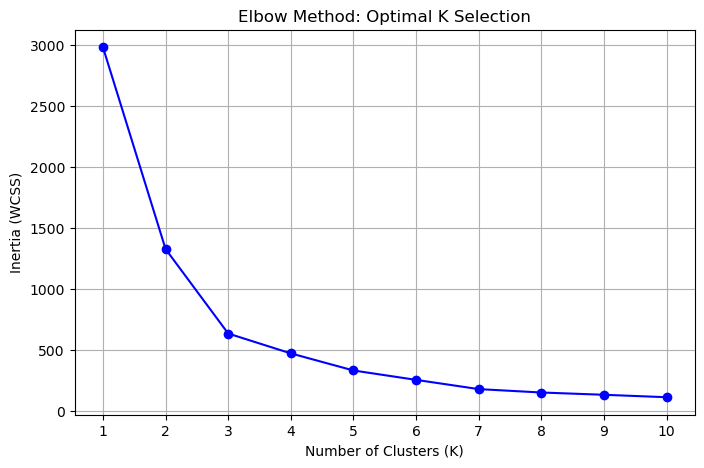

In [397]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define range for K values
K_range = range(1, 11)

# Store inertia (WCSS) values for each K
wcss = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)  # Replace with your feature set
    wcss.append(kmeans.inertia_)  # Store WCSS

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method: Optimal K Selection')
plt.xticks(K_range)
plt.grid(True)

# Show the plot
plt.show()


In [399]:

# --- Applying K-Means with K=3 ---
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_summary["Cluster_3"] = kmeans_3.fit_predict(features_scaled)

# Define cluster labels for K=3
cluster_labels_3 = {0: "Low Value", 1: "Medium Value", 2: "High Value"}
customer_summary["Customer_Segment_3"] = customer_summary["Cluster_3"].map(cluster_labels_3)

C:\Users\Randy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [403]:

# --- Compute Inertia (WCSS) ---
wcss = kmeans_3.inertia_
print(f"K-Means Inertia (WCSS): {wcss:.2f}")

# --- Compute Calinski-Harabasz Score ---
ch_score = calinski_harabasz_score(features_scaled, customer_summary["Cluster_3"])
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

K-Means Inertia (WCSS): 633.09
Calinski-Harabasz Score: 1834.22


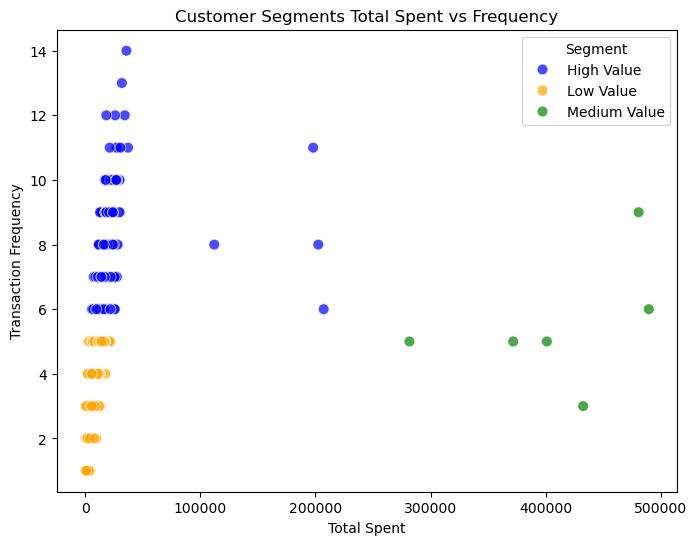

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Define colors for clusters
cluster_colors = {0: "blue", 1: "orange", 2: "green"}

# Define colors for clusters
cluster_colors = {0: "blue", 1: "orange", 2: "green"}

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_summary, 
                x="Total_Spent", 
                y="Transaction_Frequency", 
                hue="Customer_Segment_3", 
                palette=cluster_colors.values(), 
                alpha=0.7, 
                s=60)  # Adjust size of points

# Labels and title
plt.xlabel("Total Spent")
plt.ylabel("Transaction Frequency")
plt.title("Customer Segments Total Spent vs Frequency")
plt.legend(title="Segment")

# Show plot
plt.show()

C:\Users\Randy\AppData\Local\Temp\ipykernel_30676\2296809091.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=customer_summary, x="Customer_Segment_3", palette=cluster_colors)


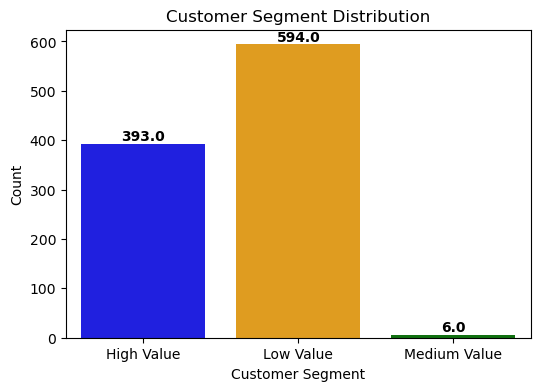

In [405]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for clusters
cluster_colors = {"Low Value": "orange", "Medium Value": "green", "High Value": "blue"}

# Create bar chart
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=customer_summary, x="Customer_Segment_3", palette=cluster_colors)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels and title
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.title("Customer Segment Distribution")

# Show the plot
plt.show()
